# Worksheet 12

Name:  Houjie Jiang  
UID: U65333668

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Yes. There are two categories, yes or no.
2. No. Because the variables to be predicted are numeric.
3. Yes. There are five categories in total, representing five stars.
4. No. Because the variables to be predicted are numeric. 

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

If the dataset is large, 20% of it can be sliced off as a validation set. Cross-validation can also be used, where one part of the data is used to learn at a time and the other part is used as validation.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting occurs when the model is too simple, resulting in poor performance on both the training and test data, this is caused by the model not having learnt enough, while overfitting occurs when the model is too complex, performing well on the training data but poorly on unseen data, this may due to the fact that the model focuses too much on some of the features of the fitted sample and ignores the global.

Signs to look out for underfitting contains high training error and high bias. The model may have few parameter.

Signs to look out for overfitting contains low training error but high test error and high variance. The model may have too many parameters.

### K Nearest Neighbors

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

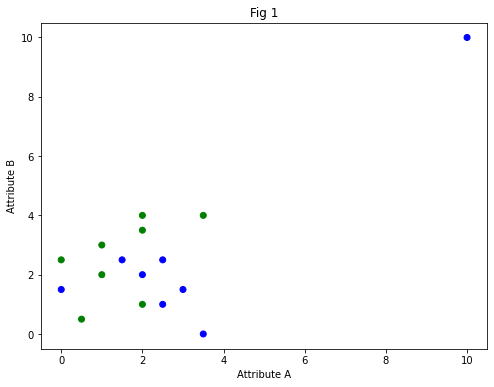

In [5]:
# Plot the data points with colors based on class labels
plt.figure(figsize=(8, 6))
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('Fig 1')
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

Yes, [10,10] may be a outlier.

In [6]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

When A==0, B==0.5, this point may be noise point, because it is surrounded by other categories of points.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

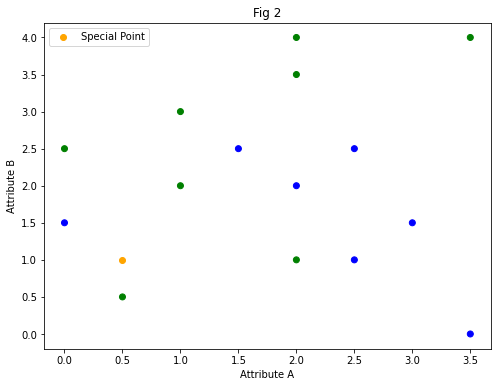

In [8]:
# Extract the point where A=0.5 and B=1
special_point = [0.5, 1]

# Define colors for each class
colors = np.array([x for x in 'bgrcmyk'])

# Plot the data points with colors based on class labels
plt.figure(figsize=(8, 6))
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())

# Plot the special point in a different color
plt.scatter(special_point[0], special_point[1], color='orange', label='Special Point')
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('Fig 2')
plt.legend()
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

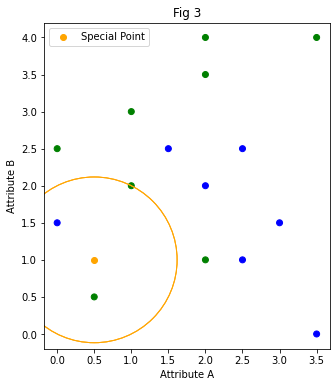

In [12]:
from math import sqrt
def n_closest_to(example, n, dataset):
    distances = []
    for i in range(len(dataset["Attribute A"])):
        dist = sqrt((example[0] - dataset["Attribute A"][i])**2 + (example[1] - dataset["Attribute B"][i])**2)
        distances.append((i, dist))
    sorted_distances = sorted(distances, key=lambda x: x[1])
    closest_indices = [index for index, _ in sorted_distances[:n]]
    closest_points = [(dataset["Attribute A"][i], dataset["Attribute B"][i]) for i in closest_indices]
    farthest_distance = sorted_distances[n - 1][1]
    return closest_points, farthest_distance

location = ( 0.5 , 1 )
# Compute closest points and farthest distance
closest_points, radius = n_closest_to(location, 3, data)

colors = np.array([x for x in 'bgrcmyk'])
plt.figure(figsize=(8, 6))
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.scatter(location[0], location[1], color='orange', label='Special Point')

# Plot circles around the special point with radius equal to the distance to the farthest of the three closest points
for point in closest_points:
    circle = plt.Circle(location, radius, color='orange', fill=False, alpha=0.8)
    plt.gcf().gca().add_artist(circle)

plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('Fig 3')
plt.legend()

# Set aspect ratio, so that the circle in the diagram can appear to be a circle.
plt.gca().set_aspect('equal')
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [17]:
def majority(points, dataset):
    class_counts = {0: 0, 1: 0}  # Initialize class counts
    for point in closest_points:
        index = dataset["Attribute A"].index(point[0])  # Find the index of the point in the dataset
        class_label = dataset["Class"][index]  # Get the class label of the point
        class_counts[class_label] += 1  # Increment the count for the corresponding class label
    majority_class = max(class_counts, key=class_counts.get)  # Find the class with the majority of points
    return majority_class

closest_points, _ = n_closest_to(location, 3, data)
assigned_class = majority(closest_points,data)
print("Class assigned to the new point:", assigned_class)

Class assigned to the new point: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [19]:
count = 0
total_points = len(data["Attribute A"])
for i in range(total_points):
    # Exclude the i-th point and consider the rest as the training set
    test_point = (data["Attribute A"][i], data["Attribute B"][i])
    actual_class = data["Class"][i]
    training_set = {
        "Attribute A": data["Attribute A"][:i] + data["Attribute A"][i+1:],
        "Attribute B": data["Attribute B"][:i] + data["Attribute B"][i+1:],
        "Class": data["Class"][:i] + data["Class"][i+1:]
    }
    # Classify the test point using the training set
    closest_points, _ = n_closest_to(test_point, 3, training_set)
    prediction = majority(closest_points, training_set)
    # Check if the prediction matches the actual class
    if prediction == actual_class:
        count += 1

# Calculate the overall testing accuracy
accuracy = count / total_points

print("overall accuracy = ",accuracy)

overall accuracy =  0.6


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [22]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

# Split the dataset into training and testing sets with a ratio of 80:20 and random_state=1
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (56000, 784) (56000,)
Testing set shape: (14000, 784) (14000,)


b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

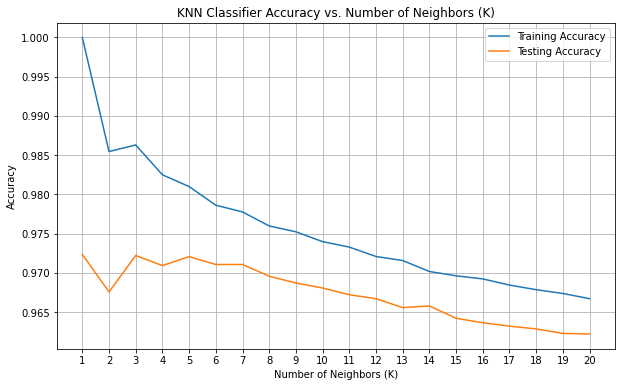

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Convert data to numpy arrays and ensure they are contiguous
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)
y_train = np.ascontiguousarray(y_train)
y_test = np.ascontiguousarray(y_test)

# Lists to store training and testing accuracies for each value of k
train_accuracies = []
test_accuracies = []

# Values of k to iterate over
k_values = range(1, 21)

# Iterate over each value of k
for k in k_values:
    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Compute training accuracy
    train_accuracy = knn.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Compute testing accuracy
    test_accuracy = knn.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plot the graph of training and testing accuracies vs. number of neighbors (k)
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Testing Accuracy')
plt.title('KNN Classifier Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

K==3 is optimal, because as k becomes larger, testing accuracy instead becomes lower. When k==1,the results may less stable

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

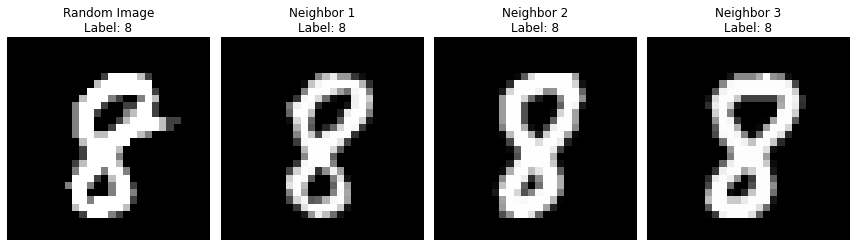

In [27]:
# Choose a random index from the testing dataset
random_index = np.random.randint(len(X_test))

# Select the random image and its corresponding label
random_image = X_test[random_index]
random_label = y_test[random_index]

# Reshape the random image to its original dimensions (28x28)
random_image = random_image.reshape(28, 28)

# Train KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=4)  # Including the random image itself
knn.fit(X_train, y_train)

# Find the indices of the 4 nearest neighbors of the random image
distances, indices = knn.kneighbors([random_image.flatten()])

# Plot the random image and its 3 nearest neighbors
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(random_image, cmap='gray')
plt.title('Random Image\nLabel: {}'.format(random_label))
plt.axis('off')

for i, index in enumerate(indices[0]):
    if i == 0:
        continue  # Skip the first index, which is the random image itself
    neighbor_image = X_train[index].reshape(28, 28)
    neighbor_label = y_train[index]
    plt.subplot(1, 4, i + 1)
    plt.imshow(neighbor_image, cmap='gray')
    plt.title('Neighbor {}\nLabel: {}'.format(i, neighbor_label))
    plt.axis('off')

plt.tight_layout()
plt.show()

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA 

dimensions = [10, 30, 50, 100, 150]
accuracies = {}

for dimension in dimensions:
    # Create a pipeline with PCA for dimensionality reduction and KNN for classification
    dimensionality_reduction = PCA(n_components=dimension)
    knn_model = KNeighborsClassifier(n_neighbors=3)
    model = make_pipeline(dimensionality_reduction, knn_model)

    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accuracies[dimension] = accuracy

for dimension, accuracy in accuracies.items():
    print(f"Dimension: {dimension}, Testing Accuracy: {accuracy}")

Dimension: 10, Testing Accuracy: 0.9260714285714285
Dimension: 30, Testing Accuracy: 0.978
Dimension: 50, Testing Accuracy: 0.9770714285714286
Dimension: 100, Testing Accuracy: 0.9749285714285715
Dimension: 150, Testing Accuracy: 0.9740714285714286


In order to pick the most appropriate dimension, I tried a different set of values and picked the one with the highest percentage of correctness in the test set.

The main reason why dimensionality reduction makes the model run faster is because the time to calculate the Euclidean distance is reduced.

The reason why dimensionality reduction makes the correctness rate higher may be due to discarding unnecessary information and making the properties of the nearest neighbour points more similar

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

In [54]:
import pandas as pd
from sklearn.model_selection import cross_val_score
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Whether or not you're alone on the boat may have an effect on the probability of survival.
def alone(row):
    if row['SibSp'] == 0 and row['Parch'] == 0:
        return 1
    else:
        return 0   
train['alone'] = train.apply(alone, axis=1)
test['alone'] = test.apply(alone, axis=1)
survival_prob = train.groupby('alone')['Survived'].mean()
print("Probability of survival for different values of 'alone':")
print(survival_prob)
# The survival rate of those who go on board alone is lower. The new trait is working.

# Try the Embarked feature for similar properties. 
survival_prob = train.groupby('Embarked')['Survived'].mean()
print("Probability of survival for different values of 'Embarked':")
print(survival_prob)
# Q and S has about the same survival rate, and combining them into one category creates a derived feature
def map_embarked(value):
    if value == 'C':
        return 1
    else:
        return 0
train['Embarked_re'] = train['Embarked'].map(map_embarked)
test['Embarked_re'] = test['Embarked'].map(map_embarked)

def map_sex(value):
    if value == 'male':
        return 0
    else:
        return 1
train['Sex_re'] = train['Sex'].map(map_sex)
test['Sex_re'] = test['Sex'].map(map_sex)

# Discard useless features and label
label=train['Survived']
train.drop(['SibSp', 'Parch', 'Name', 'Ticket','Cabin', 'PassengerId','Sex','Embarked','Survived'], axis=1, inplace=True)
test.drop(['SibSp', 'Parch', 'Name', 'Ticket','Cabin', 'PassengerId','Sex','Embarked'], axis=1, inplace=True)

# Fill NA
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(train['Age'].mean(), inplace=True)
train['Fare'].fillna(train['Fare'].mean(), inplace=True)
test['Fare'].fillna(train['Fare'].mean(), inplace=True)
train['Pclass'].fillna(train['Pclass'].mode()[0], inplace=True)
test['Pclass'].fillna(train['Pclass'].mode()[0], inplace=True)

# Choose optimal K
k_values = range(2, 6)
cv_scores = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train, label, cv=3)
    cv_scores[k] = scores.mean()
optimal_k = max(cv_scores, key=cv_scores.get)
optimal_score = cv_scores[optimal_k]
print("Optimal k:", optimal_k)
print("Mean Cross-Validation Score:", optimal_score)

# Get the result
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
knn_classifier.fit(train, label)
predictions = knn_classifier.predict(test)


Probability of survival for different values of 'alone':
alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64
Probability of survival for different values of 'Embarked':
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64
Optimal k: 3
Mean Cross-Validation Score: 0.6902356902356903


1. Look at the data to see if new features can be constructed from the original features
2. Checking the validity of constructed new features.If valid, streamline away the features used to construct new features.
3. Discard useless features and label and fill NA.
4. Selection of the appropriate K, which is 3, higher cross-validation scores can be achieved.
5. Fit the model. Run the fitted model.

The reason I chose these two added features:
1. Whether or not a person is alone on the boat may have an impact on survival rates, as mutual help among family members as well as moral encouragement may boost survival rates if a person is not alone on the boat.
2. Since there are not many original features and some textual features are basically useless for knn, an attempt was made to construct a new category of features, but it seems that the remaining features could not be combined like parents and siblings, so we can only check whether Embarked has the possibility of constructing them here, and fortunately he is effective!